In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.integrate
%matplotlib inline
from IPython.display import HTML

In [2]:
dim = 2
# number of particles
N = 10
# Simulation duration T and increment dt [s]
T = 10
dt = 0.02
# Spring constant at impact [N/m]
D = 5e3

In [3]:

# Randomly position the masses in the area
# x=0.5 ... 1.5 and y = 0.5 ... 1.5 [m].
#  random.rand(R, C) = a matrix of R number of rows and C number of columns(10, 2)
r0 = 0.5 + np.random.rand(N, dim)
r0

array([[0.6276793 , 0.60284843],
       [0.52989411, 0.71173768],
       [1.15152737, 0.64143698],
       [0.53745043, 1.17838023],
       [0.76567555, 1.18251313],
       [0.56762293, 0.59237636],
       [1.40836229, 0.582343  ],
       [1.26553658, 1.39278276],
       [1.08249653, 1.15936335],
       [1.15744346, 1.13029184]])

In [4]:

# Choose random speeds in range
# vx = -0.5 ... 0.5 and vy = -0.5 ... 0.5 [m/s]
v0 = -0.5 + np.random.rand(N, dim)
v0

array([[ 0.08621995, -0.42308652],
       [-0.44526324,  0.30599434],
       [-0.08810876,  0.24632981],
       [ 0.24040027,  0.22658355],
       [-0.4419485 ,  0.01367756],
       [ 0.25970819, -0.47905819],
       [-0.26320342, -0.00176433],
       [-0.12226752,  0.21789722],
       [-0.08812152,  0.48596145],
       [-0.1457954 ,  0.07719098]])

In [5]:

# Choose random radii in the range from 0.02 to 0.04 [m] for 10 balls
radius = 0.02 + 0.02 * np.random.rand(N)
radius

array([0.03494699, 0.03439441, 0.03771005, 0.02033495, 0.02457365,
       0.02168154, 0.02735022, 0.02167753, 0.03375641, 0.03644573])

In [6]:
# Choose random masses in berevon from 0.2 to 2.0 [kg], 1-d array
m = 0.2 + 1.8 * np.random.rand(N)
m

array([0.28463092, 0.62841936, 1.14525401, 0.44466778, 0.24286469,
       0.41514548, 1.15669386, 1.78732313, 1.23808056, 1.42385928])

In [7]:
def dgl(t, u):
    r, v = np.split(u, 2)
    r = r.reshape(N, dim)
    a = np.zeros((N, dim))

    print(f"r {r}")
    print(f"v {v}")
    print(f"u {u}")
    print(f"umax {max(u)}")
    print(f"umin {min(u)}")
    print(f"a {a}")
    for i in range(N):
        for j in range(i):
            # Calculate the distance between the centers.
            dr = np.linalg.norm(r[i] - r[j])  # norm = length = resultant
            # Calculate the penetration depth.
            # only in x axis
            # max takes the highest from the list of given values
            dist = max(radius[i] + radius[j] - dr, 0)

            # The force should be proportional to the penetration depth.
            F = D * dist
            er = (r[i] - r[j]) / dr
            a[i] += F / m[i] * er
            a[j] -= F / m[j] * er
    return np.concatenate([v, a.reshape(-1)])

In [8]:
# Fix the state vector at time t=0.
u0 = np.concatenate((r0.reshape(-1), v0.reshape(-1)))
u0

array([ 0.6276793 ,  0.60284843,  0.52989411,  0.71173768,  1.15152737,
        0.64143698,  0.53745043,  1.17838023,  0.76567555,  1.18251313,
        0.56762293,  0.59237636,  1.40836229,  0.582343  ,  1.26553658,
        1.39278276,  1.08249653,  1.15936335,  1.15744346,  1.13029184,
        0.08621995, -0.42308652, -0.44526324,  0.30599434, -0.08810876,
        0.24632981,  0.24040027,  0.22658355, -0.4419485 ,  0.01367756,
        0.25970819, -0.47905819, -0.26320342, -0.00176433, -0.12226752,
        0.21789722, -0.08812152,  0.48596145, -0.1457954 ,  0.07719098])

In [9]:
result = scipy.integrate.solve_ivp(dgl, [0, T], u0, max_step=dt,
                                   t_eval=np.arange(0, T, dt))
result

r [[0.6276793  0.60284843]
 [0.52989411 0.71173768]
 [1.15152737 0.64143698]
 [0.53745043 1.17838023]
 [0.76567555 1.18251313]
 [0.56762293 0.59237636]
 [1.40836229 0.582343  ]
 [1.26553658 1.39278276]
 [1.08249653 1.15936335]
 [1.15744346 1.13029184]]
v [ 0.08621995 -0.42308652 -0.44526324  0.30599434 -0.08810876  0.24632981
  0.24040027  0.22658355 -0.4419485   0.01367756  0.25970819 -0.47905819
 -0.26320342 -0.00176433 -0.12226752  0.21789722 -0.08812152  0.48596145
 -0.1457954   0.07719098]
u [ 0.6276793   0.60284843  0.52989411  0.71173768  1.15152737  0.64143698
  0.53745043  1.17838023  0.76567555  1.18251313  0.56762293  0.59237636
  1.40836229  0.582343    1.26553658  1.39278276  1.08249653  1.15936335
  1.15744346  1.13029184  0.08621995 -0.42308652 -0.44526324  0.30599434
 -0.08810876  0.24632981  0.24040027  0.22658355 -0.4419485   0.01367756
  0.25970819 -0.47905819 -0.26320342 -0.00176433 -0.12226752  0.21789722
 -0.08812152  0.48596145 -0.1457954   0.07719098]
umax 1.408

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



r [[ 3.20829474 -3.13446164]
 [-3.82828057  3.70676771]
 [ 0.28913112  3.05247888]
 [ 2.89045485  3.39614847]
 [-3.56005492  1.31638721]
 [ 1.91889455 -4.37343214]
 [-1.16783615  0.56507401]
 [ 0.0687991   3.52553043]
 [ 0.21997535  5.91588639]
 [-0.26958165  1.88582644]]
v [ 0.26431528 -0.38167694 -0.44526324  0.30599434 -0.08810876  0.24632981
  0.24040027  0.22658355 -0.4419485   0.01367756  0.13760296 -0.50744932
 -0.26320342 -0.00176433 -0.12226752  0.21789722 -0.08812152  0.48596145
 -0.1457954   0.07719098]
u [ 3.20829474e+00 -3.13446164e+00 -3.82828057e+00  3.70676771e+00
  2.89131120e-01  3.05247888e+00  2.89045485e+00  3.39614847e+00
 -3.56005492e+00  1.31638721e+00  1.91889455e+00 -4.37343214e+00
 -1.16783615e+00  5.65074014e-01  6.87991001e-02  3.52553043e+00
  2.19975350e-01  5.91588639e+00 -2.69581646e-01  1.88582644e+00
  2.64315276e-01 -3.81676937e-01 -4.45263243e-01  3.05994339e-01
 -8.81087565e-02  2.46329808e-01  2.40400272e-01  2.26583547e-01
 -4.41948503e-01  1.367

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3032
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44

In [10]:
t = result.t
t

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

In [11]:
r, v = np.split(result.y, 2)
r
v

array([[ 0.08621995,  0.08621995,  0.2243222 , ...,  0.26431528,
         0.26431528,  0.26431528],
       [-0.42308652, -0.42308652, -0.39138744, ..., -0.38167694,
        -0.38167694, -0.38167694],
       [-0.44526324, -0.44526324, -0.44526324, ..., -0.44526324,
        -0.44526324, -0.44526324],
       ...,
       [ 0.48596145,  0.48596145,  0.48596145, ...,  0.48596145,
         0.48596145,  0.48596145],
       [-0.1457954 , -0.1457954 , -0.1457954 , ..., -0.1457954 ,
        -0.1457954 , -0.1457954 ],
       [ 0.07719098,  0.07719098,  0.07719098, ...,  0.07719098,
         0.07719098,  0.07719098]])

In [12]:
# Convert r and v to a 3-dimensional array:
# 1. Index - particle
# 2. Index - coordinate direction
# 3. Index - timing
r = r.reshape(N, dim, -1)
v = v.reshape(N, dim, -1)
print("0")
print(r)
print("0")
print(v)
print("0")

0
[[[ 0.6276793   0.6294037   0.63187306 ...  3.24850743  3.25379373
    3.25908004]
  [ 0.60284843  0.5943867   0.58609329 ... -3.19252963 -3.20016317
   -3.2077967 ]]

 [[ 0.52989411  0.52098885  0.51208358 ... -3.89602253 -3.90492779
   -3.91383306]
  [ 0.71173768  0.71785757  0.72397746 ...  3.75332141  3.7594413
    3.76556119]]

 [[ 1.15152737  1.1497652   1.14800302 ...  0.27572633  0.27396416
    0.27220198]
  [ 0.64143698  0.64636358  0.65129018 ...  3.08995528  3.09488188
    3.09980847]]

 ...

 [[ 1.26553658  1.26309123  1.26064588 ...  0.05019743  0.04775208
    0.04530673]
  [ 1.39278276  1.39714071  1.40149865 ...  3.55868112  3.56303907
    3.56739701]]

 [[ 1.08249653  1.0807341   1.07897167 ...  0.20656862  0.20480619
    0.20304376]
  [ 1.15936335  1.16908258  1.17880181 ...  5.98982013  5.99953936
    6.00925859]]

 [[ 1.15744346  1.15452755  1.15161165 ... -0.29176283 -0.29467874
   -0.29759465]
  [ 1.13029184  1.13183566  1.13337948 ...  1.89757021  1.89911402
   

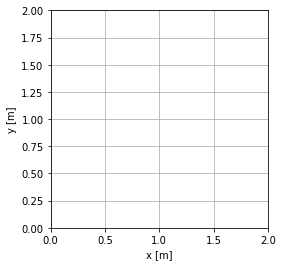

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_aspect('equal')
ax.grid()

In [14]:
# Add the graphic objects to the Axes.
ball = []
for i in range(N):
    c = mpl.patches.Circle([0, 0], radius[i])
    ax.add_artist(c)
    ball.append(c)
ball

In [15]:
def update(n):
    for i in range(N):
        ball[i].set_center(r[i, :, n])
    return ball

In [16]:
ani = mpl.animation.FuncAnimation(fig, update, interval=30,
                                  frames=t.size, blit=True)
# plt.show()

[<matplotlib.patches.Circle object at 0x7f06d16fe2e0>, <matplotlib.patches.Circle object at 0x7f06d16913d0>, <matplotlib.patches.Circle object at 0x7f06d1691820>, <matplotlib.patches.Circle object at 0x7f06d1691a90>, <matplotlib.patches.Circle object at 0x7f06d1691d00>, <matplotlib.patches.Circle object at 0x7f06d1691f70>, <matplotlib.patches.Circle object at 0x7f06d169e220>, <matplotlib.patches.Circle object at 0x7f06d169e490>, <matplotlib.patches.Circle object at 0x7f06d169e700>, <matplotlib.patches.Circle object at 0x7f06d169e9a0>]
[<matplotlib.patches.Circle object at 0x7f06d16fe2e0>, <matplotlib.patches.Circle object at 0x7f06d16913d0>, <matplotlib.patches.Circle object at 0x7f06d1691820>, <matplotlib.patches.Circle object at 0x7f06d1691a90>, <matplotlib.patches.Circle object at 0x7f06d1691d00>, <matplotlib.patches.Circle object at 0x7f06d1691f70>, <matplotlib.patches.Circle object at 0x7f06d169e220>, <matplotlib.patches.Circle object at 0x7f06d169e490>, <matplotlib.patches.Circle

In [17]:
# HTML(ani.to_html5_video())

In [18]:
!jupyter nbconvert Untitled.ipynb --to python --output myfile.py

[NbConvertApp] Converting notebook Untitled.ipynb to python
[NbConvertApp] Writing 3204 bytes to myfile.py
